In [72]:
#Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


In [73]:
#Importing dataset

df = pd.read_csv("/Users/souvikchakraborty/Downloads/archive-3/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [74]:
column_names = df.columns.tolist()
print(column_names)

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [75]:
df.rename(columns={'Chance of Admit ': 'chance'}, inplace=True)

# Data Cleaning

In [4]:
#drop the serial no. of the students as we dont need it 
df.drop('Serial No.', axis = 1, inplace = True)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
chance               float64
dtype: object

In [7]:
print("Printing the N/A values")

df.isnull().sum()

Printing the N/A values


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
chance               0
dtype: int64

# Exploratory Data Analysis

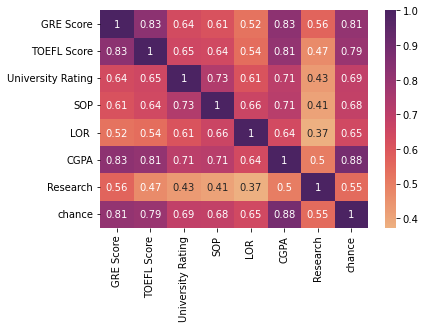

In [8]:
corr = df.corr()
#plot correlation matrix heatmap
hm = sns.heatmap(data = corr, annot = True, cmap = sns.color_palette("flare", as_cmap=True)
)

From the correlation matrix heatmap, it seems like all of the variables are all positively correlated to the chances of admission with CGPA, GRE score and TOEFL score being the highest correlated variable to chances of admission.
To further visualize our data, we plot scatter plots of the Chances of Admission against the variables.


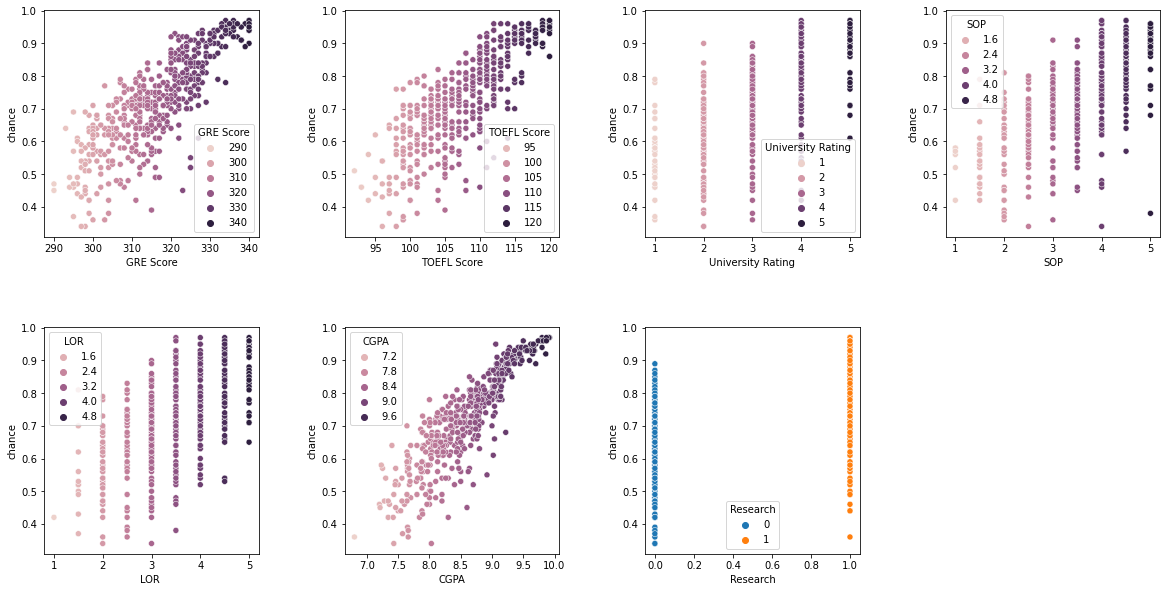

In [11]:
#plot scatter plots of Chance of Admission to each of the variables
column_names = list(df.columns)
column_names.pop(-1)
fig = plt.figure(figsize = (20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, len(column_names)):
    ax = fig.add_subplot(2, 4,i+1)
    sns.scatterplot(x = df[column_names[i]], y = df['chance'], hue = df[column_names[i]] )

From the above plots, CGPA, TOEFL score and GRE scores all appear to show a linear relationship with Chances of Admission. Students from higher University Ratings also appear to have a higher chance of admission. People with higher Statement of Purpose (SOP) and Letter of Recommendation strength (LOR) also appear to have higher chances of admission. Also, students with research experience tend to have a higher chance of admission.


# Data Preparation

In [12]:
x = df.drop('chance', axis=1)  # Drop the target column to get the input features
y = df['chance']  # Get the target column to get the target labels


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
# X contains the features, y contains the corresponding labels
# Make sure your data is properly formatted

# Create a scaler object
scaler = StandardScaler()



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)
# Fit the scaler to the training data
scaler.fit(x_train)

# Transform the training and testing data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
x_train.shape,x_test.shape

((400, 7), (100, 7))

In [51]:
cy_train=[1 if chance  > 0.83 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance  > 0.83 else 0 for chance in y_test]
cy_test=np.array(cy_test)

In [52]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Logistic regression accuracy: 0.960
--------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        80
           1       0.90      0.90      0.90        20

    accuracy                           0.96       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.96      0.96      0.96       100



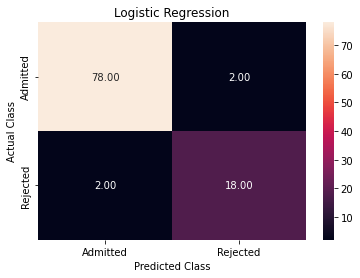

In [53]:
# Fitting logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, cy_train)


# Printing accuracy score & confusion matrix
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(cy_test, lr.predict(x_test))))
print('--------------------------------------')
from sklearn.metrics import classification_report
print(classification_report(cy_test, lr.predict(x_test)))

cy = lr.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_confm = confusion_matrix(cy, cy_test)
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression')
plt.show()


In [54]:
# Import the required libraries
from sklearn import svm

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier object
clf = svm.SVC(kernel='linear')  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.

# Train the SVM model
clf.fit(x_train, cy_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Evaluate the model's accuracy
print('SVM accuracy: {:.3f}'.format(accuracy_score(cy_test, y_pred)))


SVM accuracy: 0.960


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [61]:
clfs = {
    
    'SVC' : svc,
    'KN' : knc,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [62]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(x_train, cy_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(cy_test, y_pred)
#     precision = precision_score(cy_test,y_pred)
    
    return accuracy

In [63]:
train_classifier(svc, x_train, cy_train, x_test, cy_test)

0.71

In [64]:
accuracy_scores = []
# precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy = train_classifier(clf, x_train, cy_train, x_test, cy_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
#     print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

For  SVC
Accuracy -  0.71
For  KN
Accuracy -  0.94
For  DT
Accuracy -  0.94
For  LR
Accuracy -  0.97
For  RF
Accuracy -  0.98
For  AdaBoost
Accuracy -  0.96
For  BgC
Accuracy -  0.97
For  ETC
Accuracy -  0.96
For  GBDT
Accuracy -  0.96
For  xgb
Accuracy -  0.97


In [65]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy': accuracy_scores}).sort_values('Accuracy', ascending=False)

In [66]:
performance_df.head()

,Algorithm,Accuracy
4,RF,0.98
3,LR,0.97
6,BgC,0.97
9,xgb,0.97
5,AdaBoost,0.96


Hence,it is observed that out of all the algorithms Random Forest Classifier provides the best accuracy. Hence, we are considering this algorthm for our model.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define the base classifiers
base_classifiers = [
    ('svc' , SVC(kernel='sigmoid', gamma=1.0)),
    ('rf', RandomForestClassifier()),
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier())
]

# Define the meta-classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)

# Train the stacking classifier
stacking_classifier.fit(x_train, cy_train)

# Make predictions on the test set
y_pred = stacking_classifier.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(cy_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.97


Here, we can see that even after using Stacking layer, the model perforamnce could not be improved. Therefore, we are using Random Forest.